In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from scipy.stats.mstats import winsorize

#Loading the dataset
df = pd.read_csv('../data/AB_NYC_2019/AB_NYC_2019.csv')

#Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [34]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
#checking for any missing values
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [36]:
#missing value percentage
missing_percent = df.isnull().sum()/len(df) * 100
print("Missing Values (%):\n", missing_percent)

Missing Values (%):
 id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [37]:
#numerical columns with their stats
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [38]:
#statistics of price, minimum_nights and reviews_per_month
print("Price Stats:\n", df['price'].describe())
print("\nMinimun Nights Stats:\n", df['minimum_nights'].describe())
print("\nReviews per Month Stats:\n",df['reviews_per_month'].describe())

Price Stats:
 count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Minimun Nights Stats:
 count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Reviews per Month Stats:
 count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64


In [39]:
#Filling missing names and host names with 'Unknown'
df.fillna({'name':"Unknown", 'host_name':'Unknown'},inplace=True)

#Filling missing reviews per month with 0
df.fillna({'reviews_per_month':0}, inplace=True)

#Conversion of last review dates to datetime format and missing values handling
df['last_review'] = pd.to_datetime(df['last_review']).fillna('1970-01-01')

#Verifying missing value cleaning
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [40]:
#Statistical summary of price column
print(df['price'].describe())

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


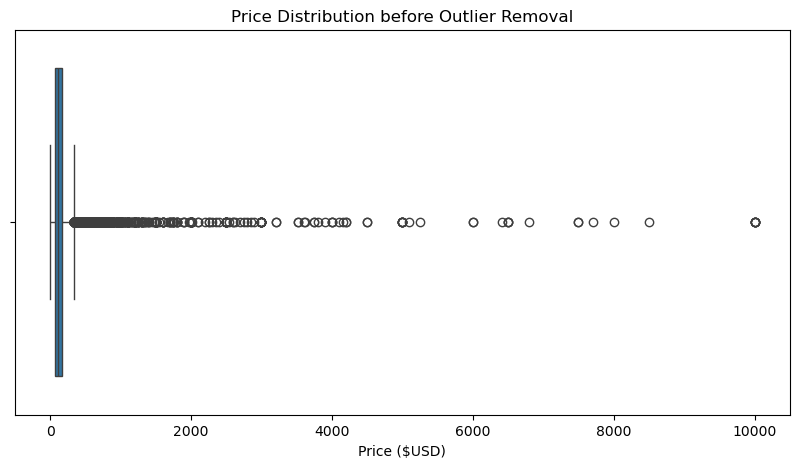

In [41]:
#Visualization of price distribution
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title('Price Distribution before Outlier Removal')
plt.xlabel('Price ($USD)')
plt.show()


In [42]:
#Removing extreme outliers
df=df.loc[(df['price'] > 0) & (df['price'] < df['price'].quantile(0.99))]

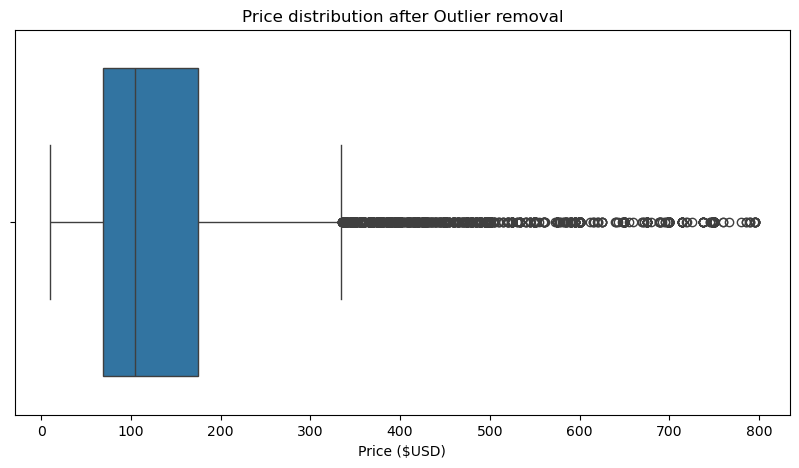

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title('Price distribution after Outlier removal')
plt.xlabel('Price ($USD)')
plt.show()

In [44]:
#IQR and bound calculations
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 : {Q1}, Q2: {Q3}, IQR:{IQR}, Lower Bound: {lower_bound}, Upper Bound : {upper_bound}")


Q1 : 69.0, Q2: 175.0, IQR:106.0, Lower Bound: -90.0, Upper Bound : 334.0


In [45]:
#Listings priced at $350–$800 may be premium but still valid
#So I'm proceeding with Modified z-score method

#listings > 334
high_price_df = df.copy()
high_price_df = df[df['price']>334]

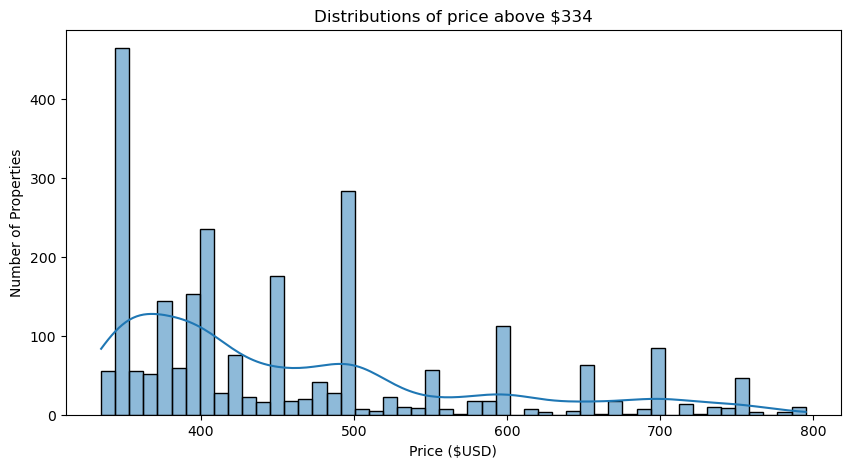

In [46]:
#Histogram for better understanding
plt.figure(figsize=(10,5))
sns.histplot(high_price_df['price'], bins=50, kde=True)
plt.title('Distributions of price above $334')
plt.xlabel('Price ($USD)')
plt.ylabel('Number of Properties')
plt.show()

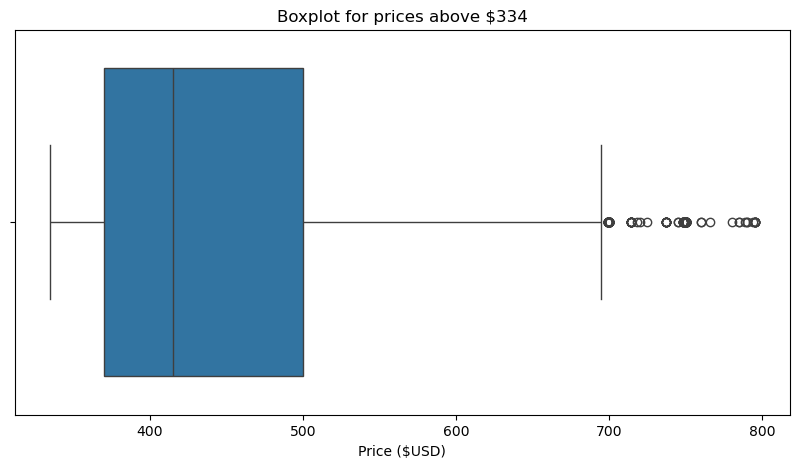

In [47]:
#boxplot for high priced property spread
plt.figure(figsize=(10,5))
sns.boxplot(x=high_price_df['price'])
plt.title('Boxplot for prices above $334')
plt.xlabel('Price ($USD)')
plt.show()

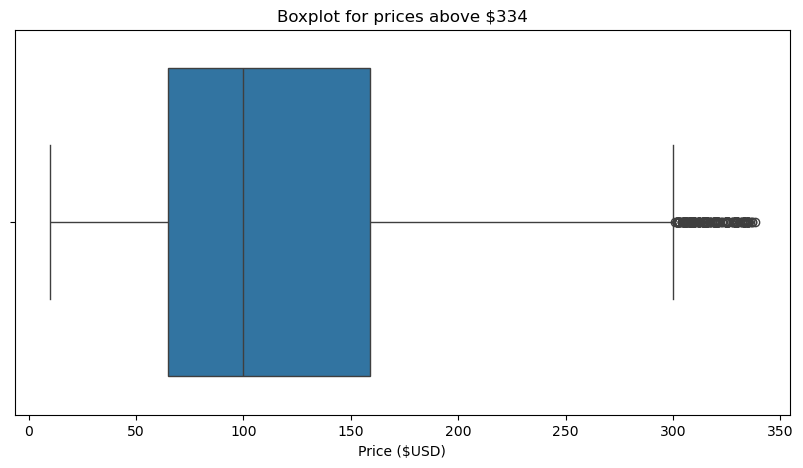

count    45924.000000
mean       120.055418
std         68.213226
min         10.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        338.000000
Name: price, dtype: float64

In [48]:
#Median Absoulte Deviation calculation
df_zscore = df.copy()
median_price = df['price'].median()
mad_price = np.median(np.abs(df['price'] - median_price))

#Modified Z-Score computation
df['modified-z'] = 0.6745 * (df['price'] - median_price) / mad_price

#Extreme outliers
extreme_outliers = df[df['modified-z']>3.5]

#Removing extreme outliers
df = df[df['modified-z']<=3.5]

#Re-plotting the graph
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title('Boxplot for prices above $334')
plt.xlabel('Price ($USD)')
plt.show()

df['price'].describe()

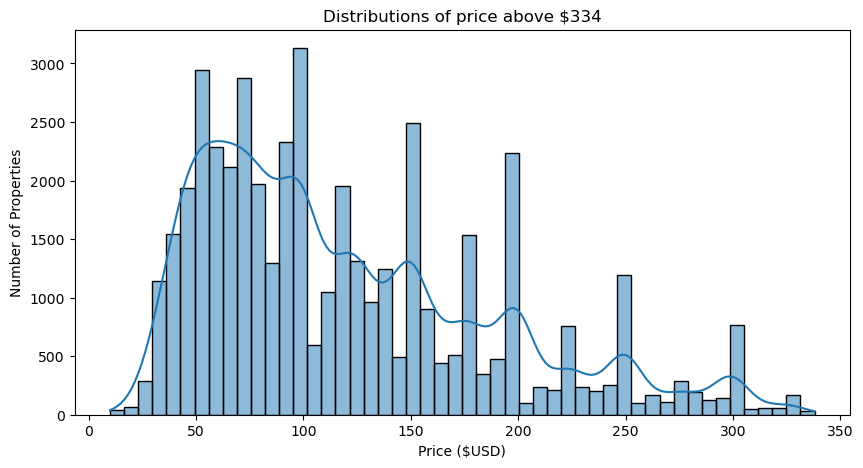

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distributions of price above $334')
plt.xlabel('Price ($USD)')
plt.ylabel('Number of Properties')
plt.show()

count    45924.000000
mean         6.938681
std         19.857787
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


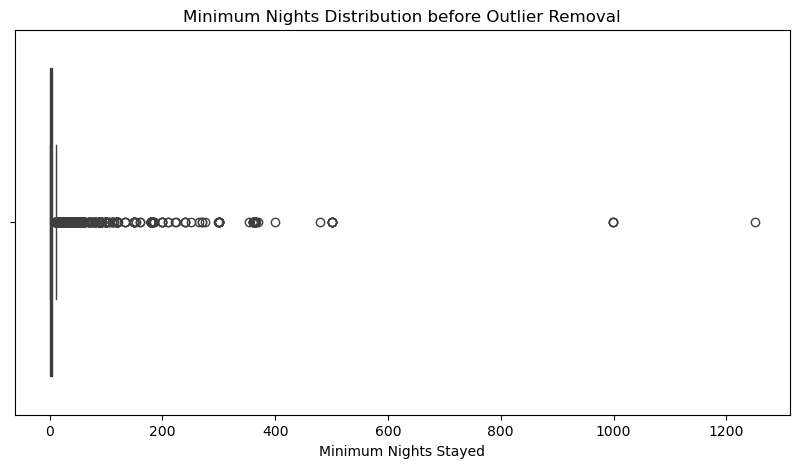

In [50]:
#Check Statistical summary for minimum nights
print(df['minimum_nights'].describe())

#Plotting the distribution
plt.figure(figsize=(10,5))
sns.boxplot(x=df['minimum_nights'])
plt.title('Minimum Nights Distribution before Outlier Removal')
plt.xlabel('Minimum Nights Stayed')
plt.show()

count    41745.000000
mean         3.511989
std          4.277948
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         29.000000
Name: minimum_nights, dtype: float64


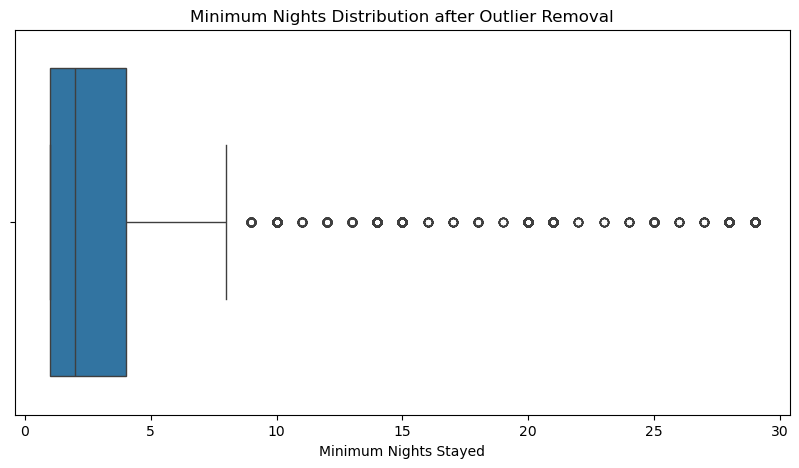

In [ ]:
#Removing extreme outliers
df=df.loc[df['minimum_nights'] < df['minimum_nights'].quantile(0.95)]

print(df['minimum_nights'].describe())

#Plotting the distribution
plt.figure(figsize=(10,5))
sns.boxplot(x=df['minimum_nights'])
plt.title('Minimum Nights Distribution after Outlier Removal')
plt.xlabel('Minimum Nights Stayed')
plt.show()

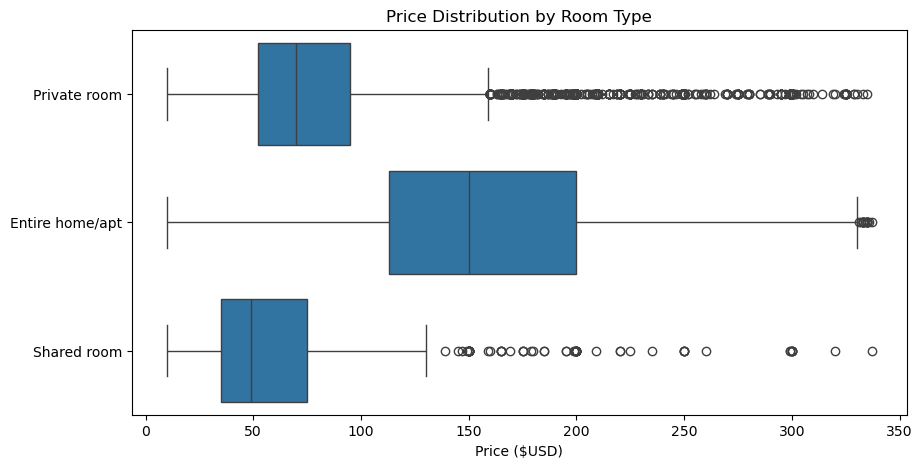

In [52]:
#Visualizations

#Price vs. Room Type

plt.figure(figsize=(10,5))
sns.boxplot(y='room_type', x='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Price ($USD)')
plt.ylabel('')
plt.show()

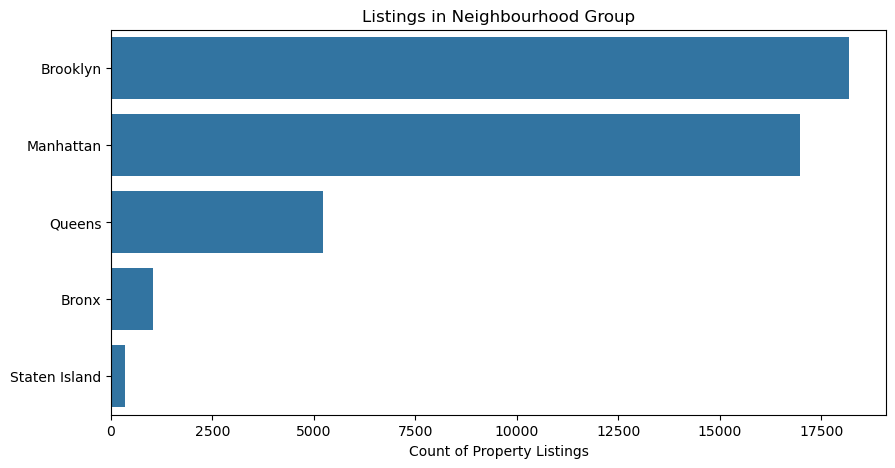

In [53]:
#Neighbourhood Analysis

plt.figure(figsize=(10,5))
sns.countplot(y=df['neighbourhood_group'], order=df['neighbourhood_group'].value_counts().index)
plt.title('Listings in Neighbourhood Group')
plt.xlabel('Count of Property Listings')
plt.ylabel('')
plt.show()

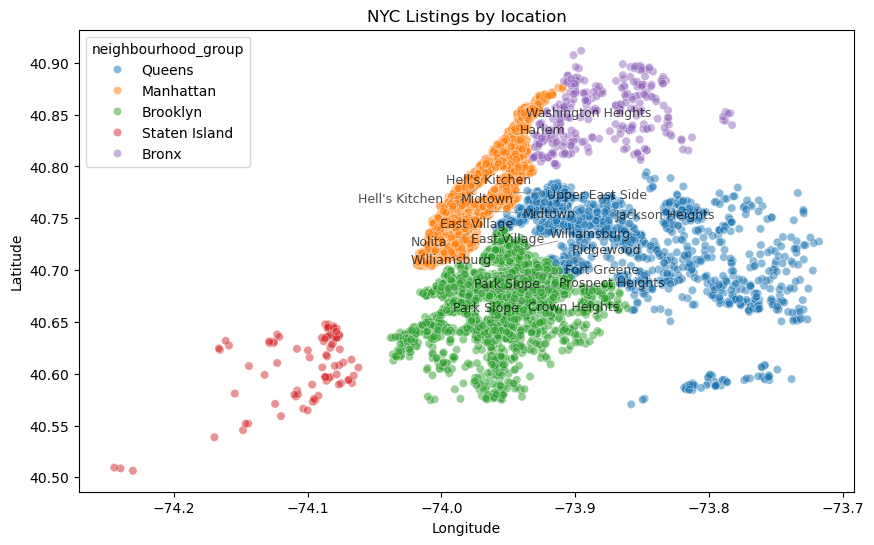

In [54]:
df_sample = df.sample(frac=0.3, random_state=42)

# Scatter plot for NYC property listings by locations
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_sample['longitude'], y=df_sample['latitude'], hue=df_sample['neighbourhood_group'], alpha=0.5)

#Labelling only top 50 most frequent neighborhoods
top_neighborhoods = df['neighbourhood'].value_counts().index[:50]
texts = []

for i in range(0, len(df_sample), 600):  # Label every 1000th point
    if df_sample['neighbourhood'].iloc[i] in top_neighborhoods:
        texts.append(plt.text(df_sample['longitude'].iloc[i], df_sample['latitude'].iloc[i], df_sample['neighbourhood'].iloc[i], fontsize=9, alpha=0.7, color='black'))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.title('NYC Listings by location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


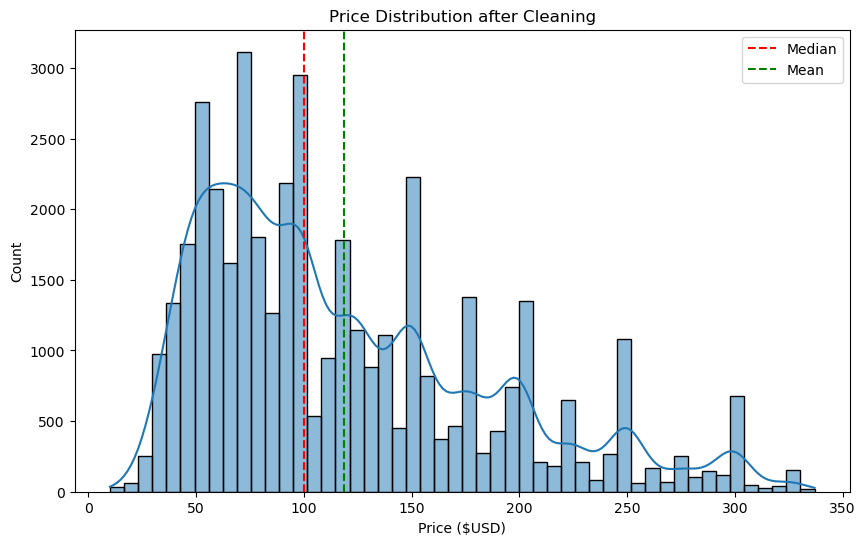

In [55]:
#Price Distribution Visualization
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.axvline(df['price'].median(), color='r', linestyle='--', label='Median')
plt.axvline(df['price'].mean(), color='g', linestyle='--', label='Mean')
plt.legend()
plt.title('Price Distribution after Cleaning')
plt.xlabel('Price ($USD)')
plt.ylabel('Count')
plt.show()

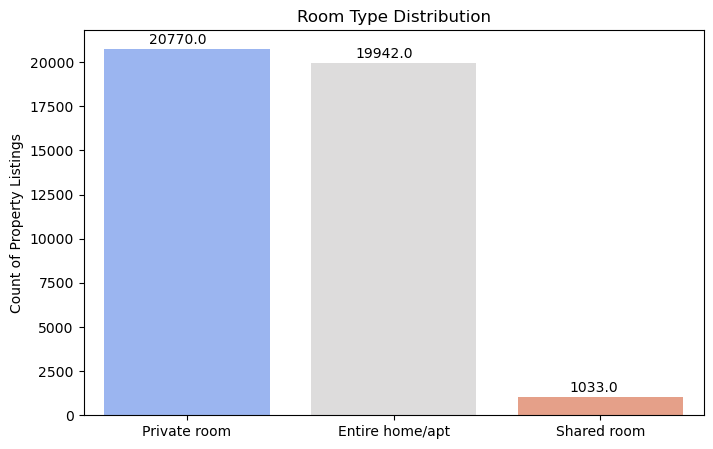

In [56]:
#Room type distribution plot

plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['room_type'], hue=df['room_type'], palette='coolwarm', legend=False)

texts = [plt.text(patch.get_x() + patch.get_width()/2, patch.get_height(), str(patch.get_height()), ha="center") for patch in ax.patches]

"""execution issue with the below method  (kernel timed out)
for patch in ax.patches:
   ax.text(patch.get_x() + patch.get_height()/2, patch.get_height()+5, str(int(patch.get_height())), ha='center', va='bottom', fontsize=10, fontweight='bold')
"""

adjust_text(texts, only_move={'y': True})
plt.ylabel('Count of Property Listings')
plt.title('Room Type Distribution')
plt.xlabel('')
plt.show()

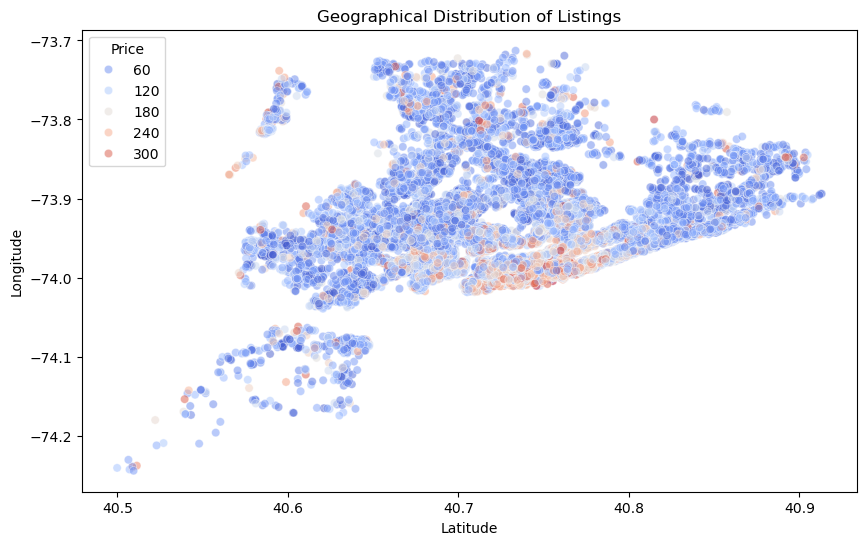

In [57]:
#Geographical Distribution of Listings

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='latitude', y='longitude', hue='price', palette='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Price')
plt.show()


In [58]:
df.to_csv('../data/AB_NYC_2019/ABC_NYC_2019_cleaned.csv')
print('Dataset cleaned & saved successfully')

Dataset cleaned & saved successfully
